In [61]:
from fast_ultrametrics import *
import numpy as np
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

In [89]:
def dfs(root, tree, callback):
    n = len(tree) + 1
    if root >= n:
        dfs(int(tree[root - n][0]), tree, callback)
        dfs(int(tree[root - n][1]), tree, callback)
    else:
        callback(root)

def assign(tab, i: int, j: int):
    tab[i] = j

def clusters(tree, n_clusters=3):
    n = len(tree) + 1
    root = n*2 - 2
    cluster_roots = [root]
    while len(cluster_roots) < n_clusters:
        inner_roots = [ r for r in cluster_roots if r >= n ]
        if len(inner_roots) == 0:
            break
        to_split = max(cluster_roots, key=lambda r: tree[r - n][2])
        cluster_roots.remove(to_split)
        cluster_roots.append( int(tree[to_split - n][0]) )
        cluster_roots.append( int(tree[to_split - n][1]) )

    result = [-1] * n
    for (num, root) in enumerate(cluster_roots):
        dfs(root, tree, lambda leaf: assign(result, leaf, num) )
    return result


In [139]:
n_samples = 1000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=6)
#print(noisy_circles)

# Basic use
Simply call 
```python
ultrametric(X)
```
where X is the set of points for which you want to compute an ultrametric

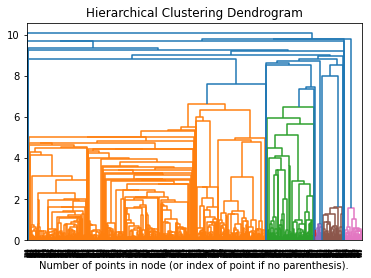

In [165]:
UM = ultrametric(noisy_circles[0],  lsh = 'lipschitz')
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(UM)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

[[ 0.2753954  -0.42233862]
 [ 0.15127833 -0.48074725]
 [-0.53602659  0.15813279]
 [ 0.89335632  0.54206235]
 [ 0.59766099 -0.09974466]
 [-0.8546512   0.48650092]
 [-0.30241181  0.36212227]
 [ 0.46287454 -0.0086787 ]
 [ 0.52626699  0.19550063]
 [ 0.24913508  0.46030887]
 [-0.25232213  0.48367756]
 [ 0.44738295 -0.34233167]
 [ 0.47261761 -0.27672671]
 [-0.38054883 -0.4159839 ]
 [ 0.01741532 -0.39665991]
 [-0.72374639  0.58363856]
 [-0.83102572  0.42698739]
 [ 0.14199337  0.51965174]
 [-0.45609403  0.87111843]
 [-0.93287626  0.2339811 ]
 [ 0.57692723  0.72845314]
 [ 1.08686311  0.16170815]
 [-0.82948105  0.6213566 ]
 [-0.08260218 -0.50540361]
 [ 1.03526786 -0.26414271]
 [-0.24591868 -0.95404626]
 [ 0.02535737  0.42808743]
 [-0.3763231  -0.29586018]
 [-0.02132968  0.99871562]
 [-0.28228221 -0.50791755]
 [ 0.95908035 -0.43552784]
 [ 1.03252921 -0.09582424]
 [-0.23022274  0.39247727]
 [ 0.04653747  0.47467873]
 [-1.0011121  -0.06222805]
 [ 0.12405467 -1.00717157]
 [ 0.29073892 -0.90184218]
 

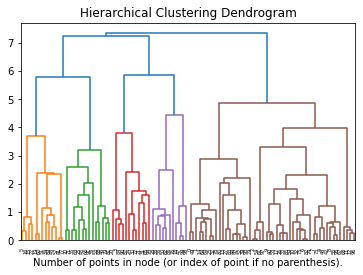

[4, 4, 5, 0, 5, 2, 5, 5, 5, 5, 5, 5, 5, 4, 4, 2, 2, 5, 1, 2, 0, 0, 2, 4, 0, 3, 5, 4, 1, 4, 0, 0, 5, 5, 2, 3, 3, 4, 1, 4, 5, 2, 5, 2, 4, 3, 3, 1, 5, 4, 1, 2, 4, 3, 5, 5, 1, 2, 5, 5, 2, 5, 1, 3, 4, 0, 3, 5, 5, 4, 3, 3, 0, 5, 5, 5, 1, 2, 4, 3, 4, 3, 5, 4, 0, 5, 1, 0, 3, 2, 0, 3, 4, 4, 0, 5, 5, 5, 1, 1]


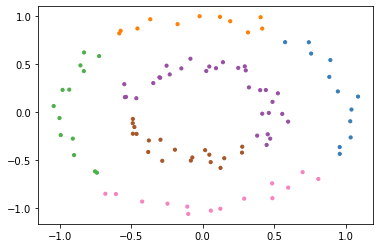

In [170]:
n_samples = 100
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=6)
n_clusters = 6
X = noisy_circles[0]


#X = np.concatenate((X,np.array([[x+2,y+2] for (x,y) in noisy_circles[0]])), axis=0)
print(X)

UM = ultrametric(X, scale_factor = 1.1,  lsh = 'balls')
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(UM)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
C = clusters(UM, n_clusters) 
print(C)
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
COLORS = [colors[y] for y in C]
plt.scatter(X[:, 0], X[:, 1], s=10, color=COLORS)
plt.show()